In [1]:
import json

arch_file ='arch.json'
with open(arch_file) as f:
    arch = json.load(f)
arch['0']

In [2]:
from model import CoNALArch
from dataset import get_loaders
from utils import *
from test import test

DEVICE = 'cuda'
DATA_DIR = 'E:/Dataset/nyu'
model_file = '..\logs\_2023_0529_1757\CoNAL_e0.pth'

# get arch from json file
arch = load_arch('arch.json')

# prepare model
model = CoNALArch(arch).to(DEVICE)

model.load_state_dict(torch.load(model_file))

BATCH_SIZE = 128

# prepare dataloaders
test_loader = get_loaders(DATA_DIR, BATCH_SIZE, stage='test')
task_metric = test(model, test_loader)
task_metric


{'0': tensor([0.1662, 0.5032]),
 '1': tensor([2.1745, 0.7852]),
 '2': tensor([41.5635, 37.0409,  0.0761,  0.2571,  0.3881])}

In [1]:
from model import CoNALArch
from dataset import get_loaders
from utils import *
from test import test


model_path = '../logs/arch_hps_2023_0530_1637/arch_hps_e30.pth'
arch_path = 'arch_hps.json'

from model import CoNALArch
from dataset import get_loaders
from utils import *

DEVICE = 'cuda'
DATA_DIR = 'E:/Dataset/nyu'

# get arch from json file
arch = load_arch(arch_path)

# prepare model
model = CoNALArch(arch).to(DEVICE)
model.load_state_dict(torch.load(model_path))
model.eval()

# prepare dataloaders
BATCH_SIZE = 4
test_loader = get_loaders(DATA_DIR, BATCH_SIZE, stage='test')
test_iter = iter(test_loader)
test_data, test_label, test_depth, test_normal = next(test_iter)
test_data.shape

1 branchs: [[], [], [], [], [], [0, 1, 2]]


torch.Size([4, 3, 288, 384])

In [2]:
from dataset import get_loaders
BATCH_SIZE = 4
test_loader = get_loaders(DATA_DIR, BATCH_SIZE, stage='test')
test_iter = iter(test_loader)
test_data, test_label, test_depth, test_normal = next(test_iter)
test_data.shape

NameError: name 'DATA_DIR' is not defined

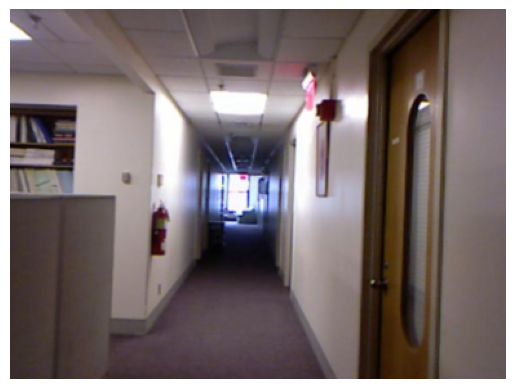

In [13]:
#从测试集中保存5张图片
import numpy as np
from matplotlib import pyplot as plt
import os

path = 'E:/Dataset/nyu/val/image'
for i in range(5):
    img_name = '{}.npy'.format(i)
    img_path = os.path.join(path, img_name)
    input_image = np.load(img_path)
    plt.axis('off')
    plt.imshow(input_image,aspect='auto')
    save_name = 'test{}.png'.format(i)
    plt.savefig(save_name, bbox_inches='tight',transparent=True, pad_inches=0)

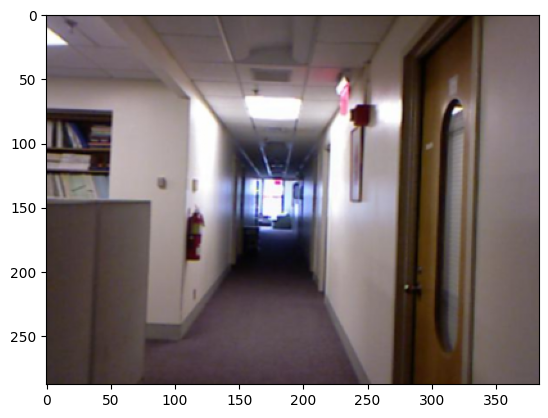

In [21]:
plt.imshow(input_image)

In [24]:
input_image.shape

(288, 384, 3)

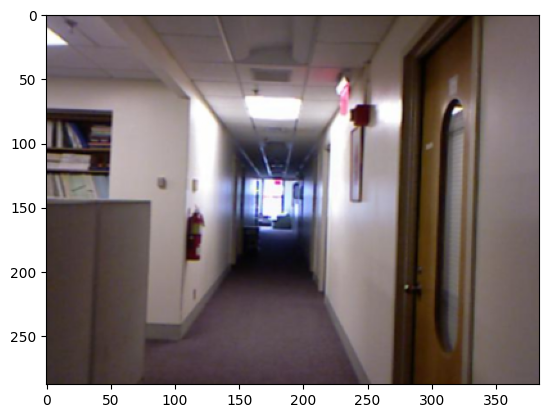

In [35]:
import torch
input_tensor = torch.from_numpy(np.moveaxis(input_image, -1, 0)).float().unsqueeze(0)
# plt.imshow()
# np.moveaxis(input_tensor, [0, 1, 2], []).shape
input_tensor = np.moveaxis(input_tensor.numpy()[0], [0, 1, 2], [2,0,1])
plt.imshow(input_tensor)

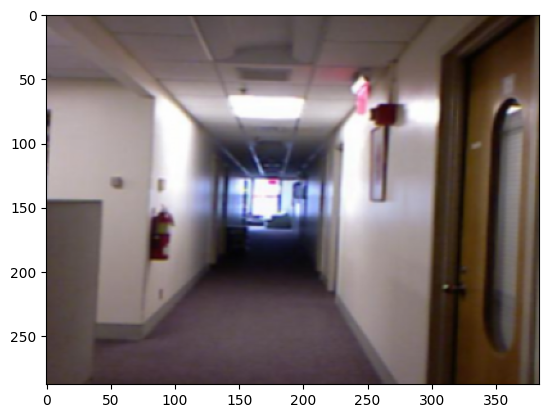

In [48]:
import cv2

img = cv2.imread('../demo/test4.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def pre_process_edgetpu(img, dims):
    output_height, output_width, _ = dims
    img = resize_with_aspectratio(img, output_height, output_width, inter_pol=cv2.INTER_LINEAR)
    img = center_crop(img, output_height, output_width)
    img = np.asarray(img, dtype='float32')
    # converts jpg pixel value from [0 - 255] to float array [-1.0 - 1.0]
    img -= [127.0, 127.0, 127.0]
    img /= [128.0, 128.0, 128.0]
    img = (img+1)/2
    return img

# resizes the image with a proportional scale
def resize_with_aspectratio(img, out_height, out_width, scale=100, inter_pol=cv2.INTER_LINEAR):
    height, width, _ = img.shape
    new_height = int(100. * out_height / scale)
    new_width = int(100. * out_width / scale)
    if height > width:
        w = new_width
        h = int(new_height * height / width)
    else:
        h = new_height
        w = int(new_width * width / height)
    img = cv2.resize(img, (w, h), interpolation=inter_pol)
    return img

# crops the image around the center based on given height and width
def center_crop(img, out_height, out_width):
    height, width, _ = img.shape
    left = int((width - out_width) / 2)
    right = int((width + out_width) / 2)
    top = int((height - out_height) / 2)
    bottom = int((height + out_height) / 2)
    img = img[top:bottom, left:right]
    return img

img = pre_process_edgetpu(img, (288, 384, 3))
plt.imshow(img)

In [2]:
import yaml

with open("config.yml", "r") as f:
    config = yaml.safe_load(f)

config['hyper']['lr']

'e-5'

i

In [3]:
with open("models/hps.yml", "r") as f:
    config = yaml.safe_load(f)
config['arch']

{0: 5, 1: 5, 2: 5}

In [38]:
examples = [['catonnx.jpg']]
gr.Interface(inference, gr.Image(type="filepath"), gr.Image(type="filepath"), title="HPS", description="", examples=examples).launch(share=False)

Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
